In [1]:
import numpy as np
from itertools import product

def show_kernel(kernel, label=True, digits=None, text_size=28):
    # Format kernel
    kernel = np.array(kernel)
    if digits is not None:
        kernel = kernel.round(digits)

    # Plot kernel
    cmap = plt.get_cmap('Blues_r')
    plt.imshow(kernel, cmap=cmap)
    rows, cols = kernel.shape
    thresh = (kernel.max()+kernel.min())/2
    # Optionally, add value labels
    if label:
        for i, j in product(range(rows), range(cols)):
            val = kernel[i, j]
            color = cmap(0) if val > thresh else cmap(255)
            plt.text(j, i, val, 
                     color=color, size=text_size,
                     horizontalalignment='center', verticalalignment='center')
    plt.xticks([])
    plt.yticks([])

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

image_path = 'C:/Users/wise1012/Desktop/Kaggle/Dataset/ComputerVision/car_feature.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image)
image = tf.constant(image)
image_converted = tf.cast(image, tf.int32)
image_converted_expands = tf.expand_dims(image_converted, axis=0)


#plt.figure(figsize=(6, 6))
#plt.imshow(tf.squeeze(image_converted), cmap='gray')
#plt.axis('off')
#plt.show();

In [8]:
filter_data = np.random.rand(3, 3, 1,10).astype(np.int32)  # Example: 64 filters
kernel = tf.constant(filter_data)

In [ ]:
import tensorflow as tf

kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
    [-1, -1, -1],
])

plt.figure(figsize=(3, 3))
show_kernel(kernel)

In [5]:
kernel.shape

TensorShape([3, 3, 1, 1])

TypeError: Invalid shape (361, 421, 10) for image data

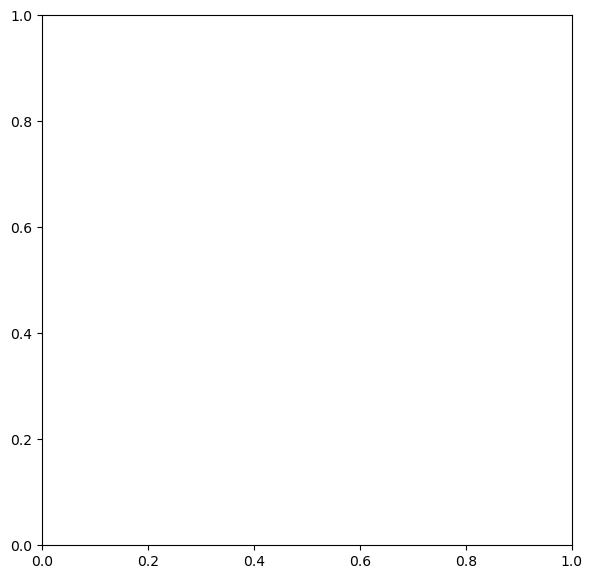

In [9]:
image_filter = tf.nn.conv2d(
    input=image_converted_expands,
    filters=kernel,
    # we'll talk about these two in lesson 4!
    strides=1,
    padding='SAME',
)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.show();

In [ ]:
image_filter.shape